##    ĐỒ ÁN CUỐI KỲ MÔN: NHẬP MÔN KHOA HỌC DỮ LIỆU (HCMUS)
<ul><h2>GV: TRẦN TRUNG KIÊN <br> SV: Nguyễn Ngọc Bình - Nguyễn Duy Khải</h2></ul>
 

<p></p>

### ĐỒ ÁN NÀY THỰC HIỆN MỘT CÂU HỎI: Đánh giá chỉ số IMDB của những bộ phim gần đây (2019-2020)

### CÂU HỎI NÀY CÓ Ý NGHĨA GÌ?
### <ul> Sẽ mang chọn được phim hay mà xem <br> <br>Nhà làm phim sẽ biết những thứ gì họ cần để thu hút người xem ngoài kich bản hay</ul>


### QUY TRÌNH THỰC HIỆN
<h3> <ul>
        Crawl dữ liệu từ web <br><br>
        Khám phá dữ liệu <br><br>
        Tiền xử lý dữ liệu <br><br>
        Chọn mô hình cho bài toán <br><br>
        Khó khăn, thuận lợi, bài học và hướng phát triển   <br><br>
        Tài liệu kham khảo 
</ul></h3>


### CÁC THƯ VIỆN SỬ DỤNG

In [1]:
# cài đặt thư viện missingno để visuallize missing value các cột
!pip install missingno

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import missingno as msno 
import numpy as np
import datetime as dt 
import time
import matplotlib.pyplot as plt
import re

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import KBinsDiscretizer
from sklearn import set_config
set_config(display='diagram') # Để trực quan hóa pipeline

### I. CRAWl DỮ LIỆU TỪ WEBSITE

<ul> Dữ liệu đánh giá phim nhóm lấy từ website  <a href="https://www.imdb.com"> <b>IMDB</b></a>, đây là một website đánh giá và review phim khá uy tín mà nhóm đã tìm hiểu được. Trong hầu hết website phim thì luôn đề cập điểm imdb (là cái điểm cạnh ngôi sao mà những bộ phim hay để), để bước tiếp thì nhóm sẽ nói sơ về điểm imdb <b>(Internet Movie Database) </b>  là một thư viện điện ảnh cung cấp nhiều chủ đề như phim, đạo diễn, diễn viên, phim và nhiều loại hình giải trí. Nổi bậc hơn là nơi đánh giá các bộ phim trên thang điểm 10 với các tiêu chí: kịch bản, diễn xuất, bối cảnh, hiệu ứng kỹ xảo và kỹ thuât quy phim. Điểm này được đánh giá bởi đông đảo những người xem nên độ tin cậy cũng khá ổn.</ul>

<ul>Một bộ phim gồm nhiều thông tin, nhưng do mục tiêu nên nhóm chỉ lấy tên phim, xếp hạng của phim, thể loại, đạo diễn và các diễn viên có tiếng. Nhận thấy có 2 cái xếp hạng, 1 là IMDB với 1 cái là metascore, nhóm chọn IMDB </ul>

![Image of Yaktocat](https://scontent.fhan4-1.fna.fbcdn.net/v/t1.15752-9/135584979_1159547281146246_6991992338298078328_n.jpg?_nc_cat=108&ccb=2&_nc_sid=ae9488&_nc_ohc=M0cf_xn1D_sAX8B4IzV&_nc_ht=scontent.fhan4-1.fna&oh=2f6e05a73d2232473e5ed90afa97cef4&oe=6020D28A)

<ul>
    <h3>Lấy dữ liệu bộ phim trong hai năm gần đây </h3><br>
    <ul>
        Trong phạm vi giới hạn của nhóm, nhóm chỉ lấy vài thông tin như là tên movie, thời gian chiếu, thể loại, tên đạo diễn và ngôi sao tham dự và hạng
    </ul>
</ul>



<h3><ul>Năm 2019</ul></h3>

In [150]:
df = pd.DataFrame(columns=['Title','Runtime','Genre','Rating','Directors','Stars'])
for i in range(200):

    time.sleep(0.01)
    page = 1+50*i
    print(page)
    url = f'https://www.imdb.com/search/title/?title_type=feature&year=2019-01-01,2019-12-31&start={page}&ref_=adv_nxt'
    html_text = requests.get(url).text
    tree = BeautifulSoup(html_text, 'html.parser')
    movies = tree.find_all('div', {'class': 'lister-item-content'})
    
    for movie in movies[:]:
        rating = movie.find('strong')#.text
        title = movie.find('h3',{'class':'lister-item-header'}).text.replace('\n',' ')#[4:-2]
        genre  = movie.find('p', {'class':'text-muted'})\
                        .find('span', {'class':'genre'})
        
        directors_and_stars_p = movie.find('p',{'class':''})
        runtime = movie.find('span', {'class':'runtime'})
        if rating != None : 
            rating = rating.text
            if genre: genre = genre.text.strip()
            if runtime: runtime = runtime.text.split(' ')[0].replace(',','')
                
            directors = re.search(r'(Directors|Director):([.\s\S]+)\|', directors_and_stars_p.text)
            stars = re.search(r'(Stars|Star):([.\s\S]+)', directors_and_stars_p.text)
            if (directors): directors = ','.join(directors[2].strip().split(', \n'))
            if (stars): stars = ','.join(stars[2].strip().split(', \n'))
            df = df.append({'Title':title,'Runtime': runtime,'Genre':genre,'Rating':rating,'Directors':directors,'Stars':stars}, ignore_index = True)

df.to_csv('movie2019.csv', index = False, encoding = 'utf-8')

1
51
101
151
201
251
301
351
401
451
501


KeyboardInterrupt: 

<h3><ul>Năm 2020</ul></h3>

In [ ]:
def add_dict_value_other(s,dict_temp): 
    s=s[s.find('Director'):].replace('\n','').replace('Votes','|Votes').split('|')
    for item in s:
        temp =item.strip().split(':')
        if(temp[0]=='Director' or temp[0]=='Stars'):
            dict_temp[temp[0]]=temp[1] 

In [ ]:
num_title= 1
max_num =9881
check_break=0
action_movie=[]
num_movies=0
while(1):
    if(num_title==1):
        link_page=f'https://www.imdb.com/search/title/?title_type=feature&year=2020-01-01,2020-12-31&sort=year,desc'
    else:
        link_page = f'https://www.imdb.com/search/title/?title_type=feature&year=2020-01-01,2020-12-31&sort=year,desc&start={num_title}&ref_=adv_nxt'
    #lấy nội dung lưu vào dict
    html_text = requests.get(link_page).text
    tree = BeautifulSoup(html_text, 'html.parser')
    movies = tree.find_all('div',{'class':'lister-item mode-advanced'})
    for movie in movies:
        num_movies+=1
        dict_temp_movie ={}
        header=movie.find('h3',{'class':'lister-item-header'})
        dict_temp_movie['Name']= header.a.text
        text_muted =movie.find('p',{'class':'text-muted '})
        try:
            runtime=int(text_muted.find('span','runtime').text.split()[0])
        except:
            runtime=0
        dict_temp_movie['Runtime']=runtime
        try:
            genre=text_muted.find('span','genre').text.strip().strip('\n').strip(' ')#.split(', ')
        except:
            genre=None
        dict_temp_movie['Genre']=genre
        ratings_bar =movie.find('div',{'class':'ratings-bar'})
        try:
            IMDB_score = float(ratings_bar.find('div',{'class':'inline-block ratings-imdb-rating'})['data-value'])
            dict_temp_movie['IMDB'] = IMDB_score
            sort_num_votes_visible = movie.find('p','sort-num_votes-visible').text
            add_dict_value_other(movie.text,dict_temp_movie)
            action_movie.append(dict_temp_movie)
        except:
            pass
    time.sleep(1)
    if(num_movies>=max_num):
        break
    num_title+=50
df = pd.DataFrame(action_movie)
df.to_csv('movies2020.csv',index=False)

## II.Khám phá dữ liệu (đủ để có thể xác định câu hỏi mà không làm mình hiểu quá sâu toàn bộ dữ liệu)
<ul>Đọc hai file csv lên để gộp và xử lý</ul>

In [3]:
df2020= pd.read_csv('movies2020.csv')
df2019=pd.read_csv('movies2019.csv')
df2020.rename(columns = {'Name':'Title','IMDB':'Rating','Director':'Directors'}, inplace = True)
df=pd.concat([df2019,df2020],ignore_index=True)

In [4]:
df.head()

,Title,Runtime,Genre,Rating,Directors,Stars
0,1. The Gentlemen (2019),113.0,"Action, Comedy, Crime",7.8,Guy Ritchie,"Matthew McConaughey,Charlie Hunnam,Michelle Do..."
1,2. Knives Out (2019),130.0,"Comedy, Crime, Drama",7.9,Rian Johnson,"Daniel Craig,Chris Evans,Ana de Armas,Jamie Le..."
2,3. 1917 (2019),119.0,"Drama, Thriller, War",8.3,Sam Mendes,"Dean-Charles Chapman,George MacKay,Daniel Mays..."
3,4. Cats (2019),110.0,"Comedy, Drama, Family",2.8,Tom Hooper,"James Corden,Judi Dench,Jason Derulo,Idris Elba"
4,5. Gisaengchung (2019),132.0,"Comedy, Drama, Thriller",8.6,Bong Joon Ho,"Song Kang-Ho,Lee Sun-kyun,Cho Yeo-jeong,Choi W..."


### Dữ liệu có bao nhiêu dòng và bao nhiêu cột?

In [5]:
df.shape

(13312, 6)

### Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

Về quan sát cơ bản mỗi dòng chứa thông tin của một bộ phim đã được phát hành (bộ data chứa phim phát hành 2019, 2020 đăng tải trên IMDB)
Có vẻ Không có gì bất thường

Dữ liệu có các dòng bị lặp không?

In [6]:
df.index.duplicated().sum()

0

### Mỗi cột có ý nghĩa gì?

`Title`: Tên của bộ phim - string <br>
`Runtime`: độ dài bộ phim (số phút) - float <br>
`Genre`: Thể loại phim, một bộ phim có thể có nhiều thể loại - string <br>
`Directors`: Đạo diễn bộ phim - string <br>
`Stars`: Một số diễn viên nổi tiếng tham gia bộ phim - string <br>
`Rating`: Đánh giá phim theo user - 0.0 đến 10.0 <br>


Rating để chọn bộ phim hay để xem nên chọn giá trị là 1.0 và 0.0, 1.0 là những phim nên xem và rating >= 7.0

In [7]:
# Tỉ lệ các lớp trong cột output?
df['Rating'] = (df['Rating']>7).astype(int)
df['Rating'].value_counts(normalize=True) * 100


0    80.769231
1    19.230769
Name: Rating, dtype: float64

Tỉ lệ 8/2 với lớp 0/1, hơi không đồng đều lắm nhưng mình cứ tiếp tục nếu có vấn đề gì mình sẽ quay lại sau

## Đưa ra câu hỏi cần trả lời

 Câu hỏi cần trả lời là:

Output - Có nên mua vé đi xem bộ phim này hay không (Nên đi xem nếu ouput là 1, không nên xem nếu output là 0)? - được tính từ input - các thông tin của bộ phim (Genres, Runtime, Directors, Stars) - theo công thức nào?

Tạm thời ta sẽ để input là toàn bộ thông tin của hành khách, ta sẽ xác định cụ thể hơn ở bước tiền xử lý lúc sau.

Việc tìm ra câu trả lời này giúp đưa ra quyết định có nên bỏ mua vé tiền và bỏ thời gian để xem bộ phim này hay không (có thể là quyết định sơ bộ, sau đó có thể tìm kiếm thêm thông tin khác về bộ phim trên internet sau đó mới quyết định chẳng  hạn)


---

## Khám phá dữ liệu (để biết cách tách các tập)


In [9]:
# Cột output hiện có kiểu dữ liệu gì?
df['Rating'].dtype

dtype('int64')

Hiện tại cột labels là float (0.0-10.0), lát sau sẽ chuyển về dạng 0/1

In [10]:
# Cột output có giá trị thiếu không?
df['Rating'].isna().sum()

0

In [11]:
# Tỉ lệ các lớp trong cột output?
df['Rating'].value_counts(normalize=True) * 100

0    80.769231
1    19.230769
Name: Rating, dtype: float64

## Tiền xử lý (tách các tập)

Bây giờ ta sẽ thực hiện bước tiền xử lý là tách tập validation và tập kiểm tra ra (trong bài tập này thì chỉ tách tập validation).

In [12]:
# Tách X và y
df = df.reset_index(drop=True)
#df.loc[:,'Genre']=df.loc[:,'Genre'].replace(np.nan,'other')
X_df = df.drop(["Rating","Title"], axis=1)
y_sr = df["Rating"]

In [13]:
# tách tập train và tập validation
train_X_df, val_X_df, train_y_sr, val_y_sr = train_test_split(X_df, y_sr, test_size=0.1, random_state=0)

In [14]:
train_X_df.shape

(11980, 4)

In [15]:
train_y_sr.shape

(11980,)

## Khám phá dữ liệu (tập huấn luyện)

khám phá trên tập huấn luyện mà không lo sẽ làm kết quả trên tập validation và tập kiểm tra bị mất đi sự khách quan.

### Mỗi cột input hiện đang có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp để có thể xử lý tiếp không?

In [16]:
train_X_df.dtypes

Runtime      float64
Genre         object
Directors     object
Stars         object
dtype: object

Có vẻ các cột có kiểu dữ liệu phù hợp, hy vọng các cột object đều là string, không lẫn lộn các kiểu khác (đúng như lúc crawling data)

### Với mỗi cột input có kiểu dữ liệu dạng số, các giá trị được phân bố như thế nào?

Trong `train_X_df`, có 1/14 cột có dtype không phải là object (cột `Runtime` với kiểu float)

In [17]:
train_X_df.dtypes[train_X_df.dtypes != object]

Runtime    float64
dtype: object

In [18]:
num_cols = ['Runtime']
#df = train_X_df[num_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)
train_X_df[num_cols].agg([missing_ratio, 'min', lower_quartile, median, upper_quartile, 'max'])

,Runtime
missing_ratio,7.4
min,2.0
lower_quartile,86.0
median,96.0
upper_quartile,111.0
max,10062.0


hmm ch này max 10000 hơn lớn

### Với mỗi cột input có kiểu dữ liệu không phải dạng số, các giá trị được phân bố như thế nào?

In [19]:
pd.set_option('display.max_colwidth', 200) # Để nhìn rõ hơn
cat_cols = list(set(train_X_df.columns) - set(num_cols))
#df = train_X_df[cat_cols]
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100).round(1))
train_X_df[cat_cols].agg([missing_ratio, num_values, value_ratios])

,Stars,Directors,Genre
missing_ratio,1.5,2.2,1.1
num_values,6473,6086,380
value_ratios,"{'Sergey A.': 0.1, 'Konstantin Davydov,Valeriya Dmitrieva,Kristina Kazinskaya,Anvar Khalilulaev': 0.0, 'Danny Aiello,John Ashton,Daniel Baldwin,Tom Bower': 0.0, 'Thomas Carr,Maria Petrano,Jacob Ty...","{'James Snider': 0.3, 'Sergey A.': 0.1, 'Louisa Warren': 0.1, 'Dustin Ferguson': 0.1, 'Andrew Jones': 0.1, 'Rizal Mantovani': 0.1, 'Michael Feifer': 0.1, 'Christopher Forbes': 0.1, 'Adolfo Alix Jr...","{'Drama': 22.2, 'Comedy': 8.8, 'Horror': 5.3, 'Comedy, Drama': 5.3, 'Thriller': 3.8, 'Drama, Romance': 2.8, 'Action': 2.0, 'Comedy, Romance': 2.0, 'Drama, Thriller': 1.8, 'Comedy, Drama, Romance':..."


Do là các cột có nhiều giá trị (phân cách bởi dấu phẩy) chứ không phải một giá trị duy nhất, nên các tỉ lệ này nhìn chung không có ý nghĩa gì nhiều

Visualize missing value trong các cột thêm độ trực quan

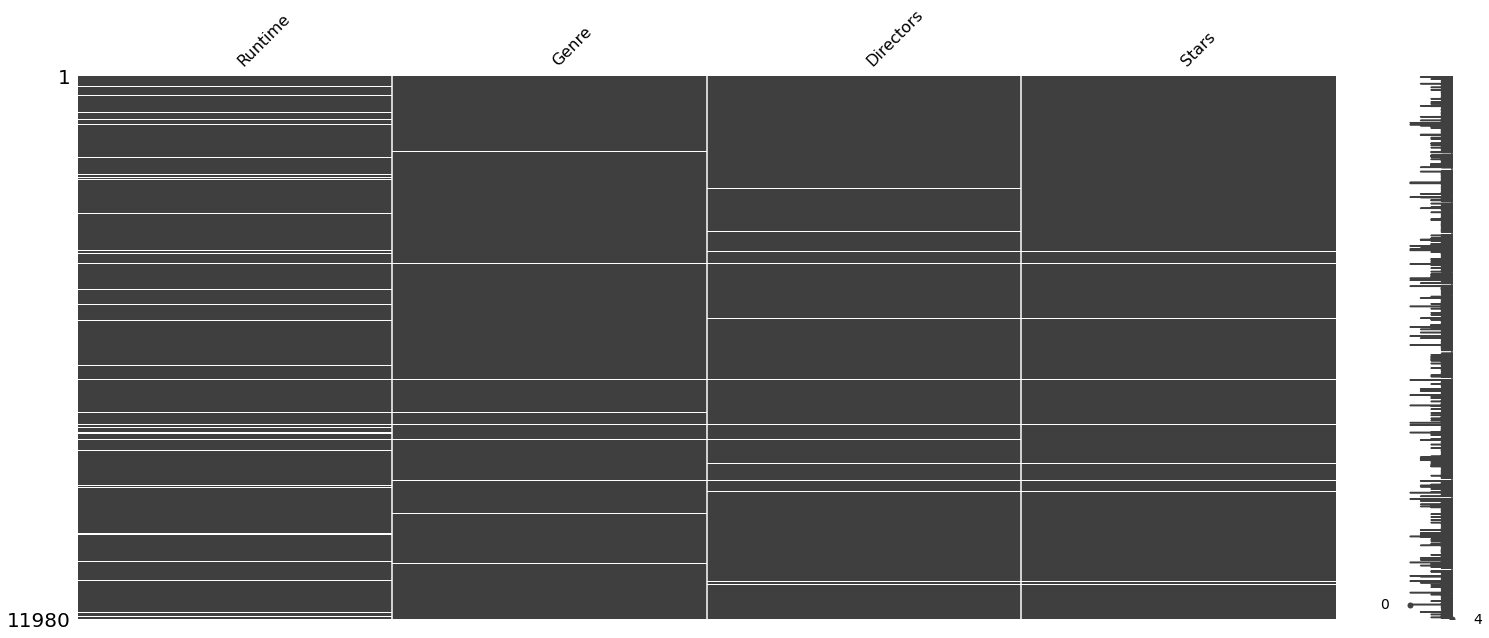

In [20]:
msno.matrix(train_X_df)

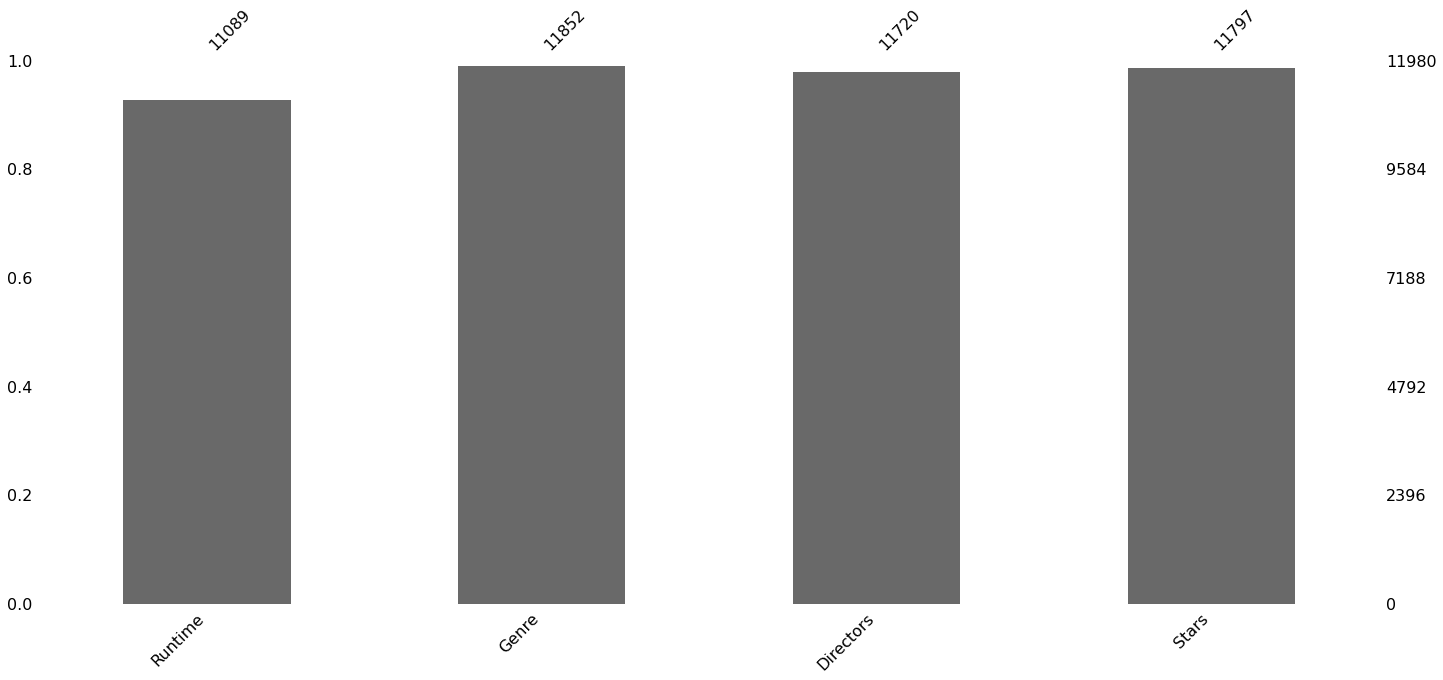

In [21]:
msno.bar(train_X_df)

## Tiền xử lý (tập huấn luyện) (3.5đ)

<ul><ul>Xử lý dữ liệu trống bằng thay thế các từ cần thiết, xóa những dòng dữ liệu bất thường, tạo dữ liệu để thực hiện bài toán, xóa luôn cột Title (tên phim) vi nó không mang giá trị, ý nghĩa</ul></ul>

### <ul>Tạo pipeline tiền xử lý dữ liệu </ul>

<ul><ul>
    <strong>Lấy dữ liệu top 100 stars trên IMDB và top 250 director trên IMDB và chuyển về dạng có hạng</strong><br>
    Danh sách lấy dựa trên xếp hạng của IMDB: <br> 
    <a href="https://www.imdb.com/list/ls045252306/"><b> - Top 100 Stars of 2018</b></a> <br>
        <a href="https://www.imdb.com/list/ls028081607/"><b> - Imdb top 250 directors of 2018</b></a>
</ul></ul>



In [23]:
stars_top100=['Karen Gillan', 'Bryce Dallas Howard', 'Alicia Vikander', 'Tom Hardy', 'Rebecca Ferguson', 'Lily James', 'Jessica Barden', 'Hannah John-Kamen', 'Josh Brolin', 'Tessa Thompson', 'Alexandra Daddario', 'Brie Larson', 'Carla Gugino', 'Emilia Clarke', 'Evangeline Lilly', 'Margot Robbie', 'Martha Higareda', 'Michael B. Jordan', 'Ruby Rose', 'Olivia Cooke', 'Morena Baccarin', 'Yvonne Strahovski', 'Julia Garner', 'Noah Centineo', 'Ana de Armas', 'Kiernan Shipka', 'John Krasinski', 'Meghan Markle', 'Jacob Elordi', 'Parker Posey', 'Rami Malek', 'Vanessa Kirby', 'Bonnie Aarons', 'Sonoya Mizuno', 'Zendaya', 'Debby Ryan', 'Gal Gadot', 'Emily Blunt', 'Timothée Chalamet', 'Naomi Scott', 'Jennifer Lawrence', 'Joey King', 'Tom Cruise', 'Joel Kinnaman', 'Jessica Chastain', 'Alden Ehrenreich', 'Bill Skarsgård', 'Zazie Beetz', 'Frances McDormand', 'Kate Siegel', 'Burt Reynolds', 'Amber Heard', 'Alison Brie', 'Chadwick Boseman', 'Daisy Ridley', 'Steve Wilder', 'Eliza Dushku', 'Lady Gaga', 'Zoey Deutch', 'Sally Hawkins', 'Jackson Odell', 'Allison Mack', 'Pom Klementieff', 'Jimmy Bennett', 'Abbie Cornish', 'Saoirse Ronan', 'Letitia Wright', 'Elizabeth Olsen', 'Dwayne Johnson', 'Gemma Chan', 'Rachel Brosnahan', 'Claire Foy', 'Milly Shapiro', 'Michelle Williams', 'Henry Cavill', 'Amy Adams', 'Chris Hemsworth', 'Lana Condor', 'Jason Momoa', 'Richard Madden', 'Joel Edgerton', 'Cate Blanchett', 'Alice Eve', 'Gary Oldman', 'Chris Pratt', 'Tom Holland', 'Hailee Steinfeld', 'Mina Sundwall', 'Ryan Reynolds', 'Cristin Milioti', 'Olivia Munn', 'Lucy Davis', 'Blake Lively', 'Mackenzie Foy', 'Amanda Fuller', 'Scarlett Johansson', 'Dichen Lachman', 'Sam Rockwell', 'Sofia Boutella', 'Evan Rachel Wood']
directors_top250= ['Christopher Nolan', 'Peter Jackson', 'Quentin Tarantino', 'Martin Scorsese', 'James Cameron', 'Steven Spielberg', 'David Fincher', 'Lee Unkrich', 'Ridley Scott', 'George Lucas', 'Stanley Kubrick', 'Zack Snyder', 'Ethan Coen', 'Joel Coen', 'Gore Verbinski', 'Francis Ford Coppola', 'Bryan Singer', 'Pete Docter', 'Matthew Vaughn', 'Anthony Russo', 'Joe Russo', 'Guy Ritchie', 'Robert Zemeckis', 'Sam Raimi', 'J.J. Abrams', 'Brad Bird', 'Alfonso Cuarón', 'Lana Wachowski', 'Lilly Wachowski', 'Doug Liman', 'David Yates', 'Luc Besson', 'Clint Eastwood', 'Chris Columbus', 'Paul Greengrass', 'Marc Webb', 'Tim Burton', 'Francis Lawrence', 'Ron Howard', 'Michael Bay', 'Sam Mendes', 'Danny Boyle', 'John McTiernan', 'Neil Burger', 'Denis Villeneuve', 'Andrew Adamson', 'James Wan', 'Edgar Wright', 'Roland Emmerich', 'John Lasseter', 'David O. Russell', 'Alfred Hitchcock', 'M. Night Shyamalan', 'Todd Phillips', 'Barry Sonnenfeld', 'Phil Lord', 'Christopher Miller', 'Steven Soderbergh', 'Antoine Fuqua', 'Guillermo del Toro', 'Darren Aronofsky', 'Hayao Miyazaki', 'Alejandro G. Iñárritu', 'Mel Gibson', 'Joss Whedon', 'Louis Leterrier', 'James Mangold', 'Sergio Leone', 'Joe Johnston', 'Michael Mann', 'Frank Darabont', 'Tony Scott', 'Andrew Niccol', 'Mike Newell', 'Brian De Palma', 'Tom Shadyac', 'Andrew Stanton', 'Wes Anderson', 'Adam McKay', 'Terry Gilliam', 'Ang Lee', 'Justin Lin', 'Jon Favreau', 'Richard Linklater', 'Ben Affleck', 'Ben Stiller', 'Len Wiseman', 'Stephen Sommers', 'Woody Allen', 'Peter Berg', 'Martin Campbell', 'Duncan Jones', 'Martin McDonagh', 'Cameron Crowe', 'Paul Thomas Anderson', 'Brett Ratner', 'Joel Schumacher', 'Rob Reiner', 'Paul Verhoeven', 'Neill Blomkamp', 'David Ayer', 'Bobby Farrelly', 'Peter Farrelly', 'Jason Reitman', 'Marc Forster', 'Ron Clements', 'John Musker', 'Bill Condon', 'Jay Roach', 'Shane Black', 'Carlos Saldanha', 'Baz Luhrmann', 'Peter Weir', 'Peter Segal', 'Matt Reeves', 'Robert Rodriguez', 'Pierre Coffin', 'Sylvester Stallone', 'Simon West', 'Dennis Dugan', 'Paul Feig', 'Nancy Meyers', 'Shawn Levy', 'Tom Tykwer', 'Joe Wright', 'Alex Proyas', 'Tom McGrath', 'Jaume Collet-Serra', 'Byron Howard', 'Chris Williams', 'F. Gary Gray', 'Paul W.S. Anderson', 'Jonathan Liebesman', 'Lasse Hallström', 'D.J. Caruso', 'Chris Weitz', 'Wolfgang Petersen', 'Roman Polanski', 'Edward Zwick', 'Kevin Smith', 'Ivan Reitman', 'Spike Jonze', 'McG', 'Nicholas Stoller', 'David Lynch', 'Robert Luketic', 'Seth MacFarlane', 'Scott Derrickson', 'George Miller', 'Oliver Stone', 'David Dobkin', 'Chris Renaud', 'Richard Donner', 'Greg Mottola', 'Martin Brest', 'David Slade', 'Olivier Megaton', 'Dean DeBlois', 'Chris Sanders', 'David Twohy', 'Jon Turteltaub', 'Wes Craven', 'Eric Darnell', 'Conrad Vernon', 'David Cronenberg', 'Charles Chaplin', 'Tom Hooper', 'Billy Wilder', 'Rob Cohen', 'David Leitch', 'J.A. Bayona', 'Kenneth Branagh', 'Kathryn Bigelow', 'Larry Charles', 'Joe Carnahan', 'Anthony Minghella', 'Rob Marshall', 'Robert Schwentke', 'Darren Lynn Bousman', 'Rawson Marshall Thurber', 'Sidney Lumet', 'David Zucker', 'Mark Neveldine', 'Brian Taylor', 'Christopher McQuarrie', 'Brian Helgeland', 'Dean Parisot', 'Frank Coraci', 'Kirk Wise', 'John Landis', 'Jan de Bont', 'Judd Apatow', 'Clyde Geronimi', 'Kevin Reynolds', 'Alexander Payne', 'Keenen Ivory Wayans', 'Bennett Miller', 'Milos Forman', 'Peyton Reed', 'Barry Levinson', 'Nick Cassavetes', 'Mel Brooks', 'Wilfred Jackson', 'Hamilton Luske', 'Seth Gordon', 'Stephen Daldry', 'Baltasar Kormákur', 'John G. Avildsen', 'John Singleton', 'John Carpenter', 'Renny Harlin', 'John Hughes', 'Garry Marshall', 'Taylor Hackford', 'Lars von Trier', 'Phillip Noyce', 'Brad Silberling', 'Anne Fletcher', 'Jack Kinney', 'Bill Roberts', 'Ben Sharpsteen', 'Jerry Zucker', 'Yimou Zhang', 'Terry Jones', 'Richard Curtis', 'Wolfgang Reitherman', 'Mike Nichols', 'Nicolas Winding Refn', 'Jake Kasdan', 'John Woo', 'Paul Weitz', 'Rob Minkoff', 'Akira Kurosawa', 'Jonathan Demme', 'Chuck Russell', 'Chris Wedge', 'John Moore', 'Harold Ramis', 'Rian Johnson', 'Andy Tennant', 'Craig Gillespie', 'Terence Young', 'Gregory Hoblit', 'Nora Ephron', 'Jean-Jacques Annaud', 'Mark Waters', 'Tim Story', 'Sofia Coppola', 'James Gunn', 'Morten Tyldum']
def create_rank_dict(rank_list):
    rank_dict = {}
    for i in range(len(rank_list)):
        rank_dict[rank_list[i]]=i+1
    return rank_dict
rank_directors= create_rank_dict(directors_top250)
rank_stars = create_rank_dict(stars_top100)

<ul>
    <ul>
        <strong>Tạo transformer tiền xử lý các cột dữ liệu</strong>
    </ul>
</ul>

<ul><ul><ul><u><b>Xử lý cột Genre:</b></u> Tách dữ liệu cột Genre thành các cột mới, với các cột mới là cacs cột phổ biến được gợi ý tren website <a href="https://www.imdb.com/chart/moviemeter/?ref_=nv_mv_mpm"> <b>IMDB</b></a>, với bộ phim nào mà có thuộc tính thể loại đó sẽ đánh là 1 và ngược lại là 0
    
</ul></ul></ul>

In [24]:
genres = ['Action','Adventure','Animation','Biography','Comedy','Crime','Drama','Family','Fantasy','Film-Noir','History',
          'Horror','Music','Musical','Mystery','Romance','Sci-Fi','Sport','Thriller','War','Western']
def GenreReplacement(string):
    #print(string)
    ls = string.split(', ')
    new_ls = [x if x in genres else 'other' for x in ls]
    return new_ls
class GenreTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X_df, y=None):
        return self
    def transform(self, X_df, y=None):
        result = X_df.copy()
        result['Genre'] = result['Genre'].apply(GenreReplacement)
        result[genres] = 0
        for genre in genres:
            result.loc[:,[genre]] = result['Genre'].apply(lambda x: 1 if genre in x else 0)
        result.drop(columns=['Genre'], inplace = True)
        return result

<ul><ul><ul><u><b>Xử lý cột Directors:</u></b> Về cơ bản thì xem phim, đạo diễn nào nổi tiếng thì phim thường sẽ hay, nên cột này sẽ so sánh xem thứ hạng Director, Director nào mà quá hạng thì sẽ coi như là hạng 251 
    
</ul></ul></ul>

In [26]:
def Directors_Replacement(director):
    if(director in directors_top250 ):
        score =rank_directors[director]
    else:
        score= 251 
    return score       
class Directors_Transformer(BaseEstimator, TransformerMixin):
    def fit(self, X_df, y=None):
        return self
    def transform(self, X_df, y=None):
        result = X_df.copy()
        result['Directors'] = result['Directors'].apply(Directors_Replacement)
        return result

<ul><ul><ul><u><b>Xử lý cột Stars:</u></b> Về cơ bản thì xem phim, diễn viên nào nổi tiếng thì phim thường sẽ hay, nên cột này sẽ so sánh xem thứ hạng các "ngôi sao điện ảnh", diễn viễn nào mà quá hạng thì sẽ coi như là hạng 251 
</ul></ul></ul>

In [28]:
def p_Stars_Replacement(stars):
    stars_list = stars.split(',')
    n=0
    for star in stars_list:
        if star in stars_top100:
            n+=1
    p=(n+1)/(len(stars_list)+1)
    return  p
def score_Stars_Replacement(stars):
    stars_list = stars.split(',')
    score= 102*4
    for star in stars_list:
        if star in stars_top100:
            score=score-rank_stars[star]
    return score
               
class Stars_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self, num_top_titles=1):
        self.num_top_titles = num_top_titles
    def fit(self, X_df, y=None):
        return self
    def transform(self, X_df, y=None):
        result = X_df.copy()
        #result.loc[:,'Stars']=result.loc[:,'Stars'].replace(np.nan,'other')
        result['p_stars']=result['Stars'].apply(p_Stars_Replacement)
        result['Stars'] = result['Stars'].apply(score_Stars_Replacement)
        return result

<ul>
    <ul>
        <strong>Tạo pipeline tiền xử lý dữ liệu với các Transformer ở trên và dùng StandardScaler</strong>
    </ul>
</ul>

In [55]:
class CustomImputer(BaseEstimator, TransformerMixin):
    def fit(self, X_df, y=None):
        return self
    def transform(self, X_df, y=None):
        result = X_df.copy()
        result.loc[:,'Stars']=result.loc[:,'Stars'].replace(np.nan,'other')
        result.loc[:,'Genre']=result.loc[:,'Genre'].replace(np.nan,'other')
        result.loc[:,'Directors']=result.loc[:,'Directors'].replace(np.nan,'other') 
        return result

In [57]:
cate_pipeline = make_pipeline(Directors_Transformer(),
                             Stars_Transformer(),
                             GenreTransformer())
                              

nume_pipeline = make_pipeline(SimpleImputer(strategy='mean'), 
                              KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans'))


In [58]:
column_trans = ColumnTransformer(
    [("trans1", nume_pipeline, ['Runtime']),
    ("trans2", cate_pipeline, ['Directors','Stars','Genre'])])

In [59]:
preprocess_pipeline = make_pipeline(
    CustomImputer(),
    column_trans,
    StandardScaler()
)
preprocess_pipeline

Pipeline(steps=[('customimputer', CustomImputer()),
                ('columntransformer',
                 ColumnTransformer(transformers=[('trans1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('kbinsdiscretizer',
                                                                   KBinsDiscretizer(encode='ordinal',
                                                                                    n_bins=3,
                                                                                    strategy='kmeans'))]),
                                                  ['Runtime']),
                                                 ('trans2',
                                                  Pipeline(steps=[('directors_transformer',
                                                                   Directors_Transformer()),
                                                                  ('stars_transformer',
                                                                   Stars_Transformer()),
                                                                  ('genretransformer',
                                                                   GenreTransformer())]),
                                                  ['Directors', 'Stars',
                                                   'Genre'])])),
                ('standardscaler', StandardScaler())])

<ul>
    <ul>
        <strong>Sử dụng pipeline vừa tạo để áp dụng lên tập train và validation</strong>
    </ul>
</ul>

In [60]:
preprocessed_train_X=preprocess_pipeline.fit_transform(train_X_df)
preprocessed_val_X=preprocess_pipeline.transform(val_X_df)

### III. CHỌN MÔ HÌNH CHO BÀI TOÁN

<ul><ul>Tiến hành xây dụng một pipeline để áp dụng model <b>MLPClassifier</b> cho bài toán </ul></ul>

In [37]:
from sklearn import linear_model
from sklearn.linear_model import ElasticNet,LinearRegression
from sklearn.preprocessing import PolynomialFeatures
model = MLPClassifier(hidden_layer_sizes=(20,), activation='relu',
                                 solver='lbfgs', max_iter=2500, random_state=0)
full_pipeline = make_pipeline(preprocess_pipeline,model)
full_pipeline

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('customimputer', CustomImputer()),
                                 ('columntransformer',
                                  ColumnTransformer(transformers=[('trans1',
                                                                   Pipeline(steps=[('simpleimputer',
                                                                                    SimpleImputer()),
                                                                                   ('kbinsdiscretizer',
                                                                                    KBinsDiscretizer(encode='ordinal',
                                                                                                     n_bins=3,
                                                                                                     strategy='kmeans'))]),
                                                                   ['Runtime']),
                                                                  ('trans2',
                                                                   Pipeline(steps=[('directors_transformer',
                                                                                    Directors_Transformer()),
                                                                                   ('stars_transformer',
                                                                                    Stars_Transformer()),
                                                                                   ('genretransformer',
                                                                                    GenreTransformer())]),
                                                                   ['Directors',
                                                                    'Stars',
                                                                    'Genre'])])),
                                 ('standardscaler', StandardScaler())])),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(20,), max_iter=2500,
                               random_state=0, solver='lbfgs'))])

In [38]:
preprocessed_train_X=preprocess_pipeline.fit_transform(train_X_df)
preprocessed_val_X=preprocess_pipeline.transform(val_X_df)

In [ ]:
# full_pipeline.get_params().keys()

In [39]:
train_errs = []
val_errs = []
alphas = [0.1, 1, 10, 100]
kbins = [2,3, 4, 5, 6]

best_val_err = float('inf'); best_alpha = None; best_k_bin = None
for alpha in alphas:
    for bins in kbins:
        # YOUR CODE HERE

        full_pipeline.set_params(pipeline__columntransformer__trans1__kbinsdiscretizer__n_bins=bins, mlpclassifier__alpha=alpha)

        full_pipeline.fit(train_X_df,train_y_sr)
        train_errs.append(1-full_pipeline.score(train_X_df,train_y_sr))
        full_pipeline.predict(val_X_df)
        val_err=(1-full_pipeline.score(val_X_df,val_y_sr))*100
        val_errs.append(val_err)
        if( best_val_err > val_err):
            best_val_err= val_err
            best_alpha= alpha
            best_k_bin = bins

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [40]:
full_pipeline.set_params(pipeline__columntransformer__trans1__kbinsdiscretizer__n_bins=best_k_bin, mlpclassifier__alpha=best_alpha)
score= full_pipeline.score(val_X_df,val_y_sr)*100
print('Độ lỗi của mô hình    \t\t',round(100-score,2))
print('Độ chính xác của mô hình\t',100-round(100-score,2))

Độ lỗi của mô hình    		 17.49
Độ chính xác của mô hình	 82.51


### IV. KHÓ KHĂN, THUẬN LỢI, BÀI HỌC VÀ HƯỚNG PHÁT TRIỂN

- Thuận lợi:
    - Dữ liệu lấy khá dễ dàng từ IMDB
    - Khá ít thuộc tính, không quá phức tạp để xử lý
    - Dữ liệu vừa phải không quá lớn, không gây quá tải
- Khó khăn:
    - Để dự đoán rating chỉ dựa vào một số thuộc tính có sẵn trên trang IMDB thì thật sự khá khó
    - Score mô hình khá thấp, theo chủ quan của nhóm nghĩ là những thuộc tính này chưa thật sự đủ và tiền xử lý dữ liệu cũng như feature engineering cũng chưa thật sự hiểu quả để cho mô hình có score cao hơn
    
- Bài học:
    - Trong việc phân tích một câu hỏi có ý nghĩa, điều quan trọng nhất là tìm chủ đề, rồi định hướng
    - Dữ liệu thường khó tìm, phải tìm rất nhiều mới ra dữ liệu có vẻ ổn, kinh nghiệm tìm kiếm data cũng được nâng cao một phân.
    
- Hướng phát triển:
    - Tìm dữ liệu sạch hơn để khai phá
    - Phân tích sâu hơn về nội dung, kỹ xảo, tiền đầu tư của phim, để có những kiến thức quyết định hơn
    

### V. TÀI LIỆU KHAM KHẢO
<ul><b>
    <a href="https://www.dienmayxanh.com/kinh-nghiem-hay/diem-imdb-la-gi-cach-chon-phim-hay-dua-tren-diem-i-1201923">IMBD là gì?</a><br>
    <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html">KBinsDiscretizer trong sklearn</a>



</b>
</ul>